<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP with TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences or text)

Another common term for NLP problems is sequence to sequence problems (seq2seq)

# Token dediğimiz şey ya bir word ya da character oluyor. Bizim seçimimize göre

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-20 08:19:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-20 08:19:35 (58.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback , plot_loss_curves , compare_historys , unzip_data , walk_through_dir , calculate_results

# Get the text data

The dataset we are going to use it NLP dataset for text samples tweets labelled as disaster or not disaster

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-08-20 08:19:40--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 74.125.196.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-08-20 08:19:40 (161 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data("nlp_getting_started.zip")

# Become one with the data

In [5]:
# Visualizing our text dataset

import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# If target label has 1 , it means that our sentence is about disasters

train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [7]:
# Shuffle training data because of we dont want to be overfitting

train_df_shuffled = train_df.sample(frac = 1 , random_state = 42) # Frac = 1 dememizin sebebi bütün datamızı shuffle etmek istiyoruz.


In [8]:
# What does the our test_dataset look like?

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# How many examples of each class?

train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# How many total samples?

len(train_df) , len(test_df)

(7613, 3263)

In [11]:
# Lets visualize some random training examples.
import random
random_index = random.randint( 0 , len(train_df) - 5)  # Create random indexes not higher than the total number of samples

for row in train_df[["text" , "target"]][random_index : random_index + 5].itertuples():  # Bu satırda, train_df veri çerçevesinde rastgele seçilen 5 satırı (veya kalan kadar satır varsa) içeren bir alt veri çerçevesini seçiyoruz. Sadece "text" ve "target" sütunlarını seçiyoruz. itertuples() işlevi, seçilen satırları birer birer dönmek için kullanılır.
  _ , text , target = row
  print(f"Target : {target} " , "(real_disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n {text}")
  print("---\n")


Target : 0  (not real disaster)
Text:
 #NowPlaying: Rene Ablaze &amp; Ian Buff - Magnitude http://t.co/Av2JSjfFtc  #EDM
---

Target : 1  (real_disaster)
Text:
 @nxwestmidlands huge fire at Wholesale markets ablaze http://t.co/rwzbFVNXER
---

Target : 0  (not real disaster)
Text:
 @ablaze what time does your talk go until? I don't know if I can make it due to work.
---

Target : 0  (not real disaster)
Text:
 'I can't have kids cuz I got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER
---

Target : 1  (real_disaster)
Text:
 Accident on I-24 W #NashvilleTraffic. Traffic moving 8m slower than usual. https://t.co/0GHk693EgJ
---



# Split data into training and validation sets

In [12]:
from sklearn.model_selection import train_test_split

train_sentences , val_sentences , train_labels , val_labels = train_test_split(train_df_shuffled["text"].to_numpy() ,train_df_shuffled["target"].to_numpy() , test_size=0.1 , random_state = 42)

In [13]:
len(train_sentences) , len(val_sentences) , len(train_labels) , len(val_labels)

(6851, 762, 6851, 762)

In [14]:
 # Check the first 10 samples

 train_sentences[ : 10] , train_labels[ : 10]  # Train sentence içindeki cümleler train_labels taki outputlarla eşleşiyor

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# Converting text into numbers

When dealing with a text problem , one of the first things you will have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this namely:
* Tokenization - Direct mapping of token (a token could be a word or a character) to number.
* Embedding - Create a matrix of feature vector for each token (the size of the feature vector can be and this embedding can be learn)

# Text vectorization (tokenization , Converting text into numbers)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

#ngram substringleri birleştiriyor. Mesela elimizde 'Imagine getting flattened by Kurt Zouma' cümlesi var. ngram = 2 dersek , "Image getting" , "flattened by" , "Kurt Zouma"  gibi ikişer ikişer substringleri birleştiriyor.

# Default values of TextVectorization
text_vectorizer = TextVectorization(max_tokens = 10000 , # How many words in the vocabulary ( automatically add <00V>)
                                                        standardize = "lower_and_strip_punctuation" ,  # Bütün harfleri küçük yapıp noktalama işaretlerini siliyor çünkü bunlar disaster olup olmadıgını anlamamıza yardım eden şeyler değil.
                                                        split = "whitespace"  , # Tokenlar arasında boşluk bırakmak için.
                                                        ngrams = None , # Create a groups of n-word
                                                        output_mode = "int" , # How to map tokens to number
                                                        output_sequence_length = None , # How long do you want your sequences to be. (None atadıgımızda en uzun tokeni alıp bütün tokenlere o lengthi veriyor. Kısa olan sentences ların sonu 0 larla dolduruluyor.)
                                                        pad_to_max_tokens = True
                                    )

In [16]:
train_sentences[0].split()  # Split bu işe yarıyor.

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [17]:
# Find the average number of tokens (words) in the training tweets
# We could just pad them to the longest , but to keep our data small , we will just find the average lenght and then make sure every tweet gets turned into numbers but those list of numbers is the same size as the average throughout every sample.

round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [18]:
# Setup text vectorization variables.

max_vocab_length = 10000 # Max number of words to have in our vocabulary
max_length = 15 # Max length our sequences will be (e.g. How many words from a Tweet does model see?). Mesela tweet 30 kelime uzunlugunda ama biz bunu 15 atadıgımız icin modelimiz ilk 15 kelimesini görecek

# Uptading our textvectorizer

text_vectorizer = TextVectorization(max_tokens = max_vocab_length ,  # Bizim bütün tweetlerimizden 10000 tane alacak bu 10000 most common lardan oluşacak
                                    output_mode = "int" ,
                                    output_sequence_length = max_length
                                    )


In [19]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [20]:
# Fit the text vectorizer to the training text

text_vectorizer.adapt(train_sentences)  # CNN deki fit işlemi gibi artık bütün train sentenceslarımıza text_vectorizerde ne yapılmasını istediysek uygulanacak.

In [21]:
# We are trying to do here is map the word data that we have to numerical form

In [22]:
# Create a sample sentence and tokenize it

sample_sentence = "There's a flood in my street!"

text_vectorizer([sample_sentence])   # Text vectorizer ı biz liste şeklinde oluşturdugumuz icin girdigimiz örnekleri [ ] içinde yazıyoruz.
# Burda shape in 0. indexi sequence i veriyor. 1 tam cümle girdiğimiz için sequence 1.
# Shape in 1. indexi de length veriyor. Max olarak 15 dediğimiz için buna adapt oluyo bizim sample ımız.

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# Choose a random sentence from our train_sentences data

import random
random_sentences = random.choice(train_sentences)

print(f"Original sentence : \n {random_sentences} \n\n  Vectorized form of our random sentence: \n")
text_vectorizer([random_sentences])

Original sentence : 
 @TheGhostParty I am@so@sorry for the deluge of HELL VINES 

  Vectorized form of our random sentence: 



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[7652,    8,    1,   10,    2,  400,    6,  603, 7018,    0,    0,
           0,    0,    0,    0]])>

In [24]:
# Get the unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()  # Get all of the unique words in our training data
top_5_words = words_in_vocab[ : 5 ] # Get the most common words in our data
bottom_5_words = words_in_vocab[ -5 :  ] # Get the least common words

print(f"Number of words in vocab : {len(words_in_vocab)} \n")
print(f"Most common words : {top_5_words} \n")
print(f"Least common words  : {bottom_5_words} \n")

Number of words in vocab : 10000 

Most common words : ['', '[UNK]', 'the', 'a', 'in'] 

Least common words  : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'] 



# Creating an Embedding using an Embedding Layer

To make our embedding we are going to use TensorFlow embedding layer.

The parameters we care most about for our embedding layers

* 'input_dim' : the size of our vocabulary
* 'output_dim' : the size of the output embedding vector , for example , a value of 100 would mean each token gets represented by a vector 100 long.
* 'input_length' : lenght of the sequences being passed to the embedding layer.

# **Note** : Neural networks 8 e bölünebilen sayılarla çok iyi çalışıyor

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding( input_dim = max_vocab_length ,  # set input shape
                             output_dim = 128 , # Output shape. Every token in the format of 128 long vector
                              input_length = max_length  # How long is each input
                              )

In [26]:
# Get a random sentence from our training data

random_sentence = random.choice(train_sentences)
print(f"Original text : \n {random_sentence}\n")
print("Embedded form")
sample_embed = embedding(text_vectorizer([random_sentence]))  # Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed

Original text : 
 Pulse rifles after weapon tuning? http://t.co/UwObuUW2mK

Embedded form


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03350664, -0.01563971, -0.00754727, ..., -0.02015247,
         -0.02595996, -0.03890523],
        [-0.02690778,  0.02521839,  0.00307877, ..., -0.00645246,
         -0.02512598, -0.0315014 ],
        [ 0.04864881, -0.04734283, -0.03064072, ...,  0.00668044,
         -0.02986774,  0.01988192],
        ...,
        [ 0.0292826 ,  0.02901805,  0.00108162, ...,  0.04551249,
         -0.0236389 ,  0.03541492],
        [ 0.0292826 ,  0.02901805,  0.00108162, ...,  0.04551249,
         -0.0236389 ,  0.03541492],
        [ 0.0292826 ,  0.02901805,  0.00108162, ...,  0.04551249,
         -0.0236389 ,  0.03541492]]], dtype=float32)>

In [27]:
# Check out a single token's embedding

sample_embed[0][0] , sample_embed[0][0].shape , sample_embed

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.03350664, -0.01563971, -0.00754727,  0.03032187,  0.03459023,
        -0.04140158,  0.02837731,  0.03987766, -0.01213332, -0.00464575,
         0.02556156, -0.01820995,  0.0042758 , -0.00913924,  0.00412831,
         0.00529081, -0.02997332,  0.04214216, -0.01279699,  0.02847533,
        -0.02476919, -0.03479801, -0.02058013, -0.02798237,  0.04238068,
         0.04996563, -0.03454103, -0.03697393, -0.0084682 , -0.03405116,
        -0.04689577,  0.04959876,  0.02177945, -0.03681321,  0.04683128,
        -0.03088265,  0.00322942, -0.04283593,  0.01868637, -0.04496003,
         0.04394449, -0.02763108,  0.02033013,  0.02982851,  0.02157657,
         0.00660473, -0.04727513,  0.01973673, -0.00952611,  0.02164323,
        -0.00502638,  0.04360865,  0.00317616,  0.01141842,  0.03603599,
        -0.00503439,  0.04276517, -0.03840371,  0.04876578,  0.03721361,
         0.02555424, -0.040527  , -0.03568215,  0.03225869, -0.00567801,
  

# Modelling a text dataset (running a series of experimentation)

Now we have got a way to turn our text sequences into numbers , it is time to start building a series of modelling experiments.

We will start with a baseline and move on from there

* Model 0 : Naive Bayes (baseline)
* Model 1 : Feed-forward neural network
* Model 2 : LSTM model (RNN)
* Model 3 : GRU model (RNN)
* Model 4 : Bidirectional LSTM (RNN)
* Model 5 : 1D Convolutional neural network (CNN)
* Model 6 : TensorFlow Hub pre-trained Feature extractor (using transfer learning for NLP)
* Model 7 : Same as model 6 but with %10 of training data

How are we going to approach all of this ?

Use standart steps in modelling with tensorflow

* Create a model
* Compile o model
* Fit the model
* Evaluate the model

## Model 0 : Getting a baseline

As with all machine learning modelling experiments , it is important to create a baseline model so you have got a benchmark for future experiments to build upon

To create our baseline, We will use sklearn Multinomial naive bayes using the TF-IDF formula to convert our words to numbers.

> **Note:** It is common practice to use non deep learning algorithms as a baseline because of their speed then later using deep learning to see if you can improve upon them

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline

model_0 = Pipeline(
    [
     ("tfidf" , TfidfVectorizer())   , # Convert words to numbers using tfidf
     ("clf" , MultinomialNB() ) # Model to text

    ]

)

# Fit the pipeline to the training data
model_0.fit(train_sentences , train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
# Evaluate our model
baseline_score = model_0.score(val_sentences , val_labels)  # In sklearn we use score instead of evaluate
baseline_score
# Bu bize accuracy veriyor.


0.7926509186351706

In [30]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[ : 20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [31]:
val_labels[ : 20]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# Creating an evaluation function for our model experiment

We could evaluate all of our model's predictions with different metrics every time , however , this will be cumbersome(hantal) and could easliy be fixed with a function

Lets create one to compare our model's predictions with the truth labels using following metrices

* Accuracy
* Precision
* Recall
* F1-score

In [32]:
# Function to evaluate : accuracy , precision , recall , f1-score
from sklearn.metrics import accuracy_score , precision_recall_fscore_support

def calculate_results(y_true , y_pred):
  """
  Calculates model accuracy , precision , recall and f1 score of a binary classification model
  """

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true , y_pred)

  # Calculate model precision , recall and f1 score using "weighted" average

  model_precision , model_recall , model_f1 , _ = precision_recall_fscore_support(y_true , y_pred , average = "weighted")
  model_results = {
      "accuracy": model_accuracy ,
      "precision": model_precision ,
      "recall": model_recall ,
      "f1-score": model_f1
  }
  return model_results

In [33]:
# Get model results

baseline_results = calculate_results(y_true = val_labels ,
                                     y_pred = baseline_preds
                                     )
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

# Model 1 : A simple dense model

In [34]:
# Create a tensorboard callback (need to create a new one for each model)

from helper_functions import create_tensorboard_callback

# Create a directory to save Tensorboard logs
save_dir = "model_logs"

In [35]:
# Build a model with Functional API
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,) , dtype = tf.string)  # shape = (1 , ) çünkü it is going to see one sequence at a time
x = text_vectorizer(inputs)  # Turn the input text into numbers
x = embedding(x) # Create an embedding of the numberized inputs.
x = layers.GlobalAveragePooling1D()(x) # Lower the dimensionality of the embedding. Eğer pooling layer eklemezsek her token için ayrı ayrı predict yapıyor. Pooling layer tek bir uzun vectore çeviriyor.
outputs = layers.Dense( 1 , activation = "sigmoid")(x)  # Create an output layer , We have binary outputs so we use 1 hidden unit and activation will be sigmoid

model_1 = tf.keras.Model(inputs , outputs , name = "model_1_dense")

In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [37]:
# Compile a model
model_1.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

# Fit the model

hist_1 = model_1.fit(x = train_sentences ,
                     y = train_labels ,
                     epochs = 5 ,
                     validation_data = (val_sentences , val_labels)  ,
                     callbacks = [create_tensorboard_callback(dir_name = save_dir , experiment_name = "model_1_dense")])   # validation datayı tuple formatta yazmamız gerekiyor.

Saving TensorBoard log files to: model_logs/model_1_dense/20230820-081944
Epoch 1/5
215/215 [==============================] - 10s 37ms/step - loss: 0.6126 - accuracy: 0.6856 - val_loss: 0.5375 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 7s 35ms/step - loss: 0.4433 - accuracy: 0.8194 - val_loss: 0.4690 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.3473 - accuracy: 0.8589 - val_loss: 0.4563 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.2858 - accuracy: 0.8930 - val_loss: 0.4678 - val_accuracy: 0.7940
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.2383 - accuracy: 0.9078 - val_loss: 0.4802 - val_accuracy: 0.7782


In [38]:
# Check the results
model_1.evaluate(val_sentences , val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7782


[0.4801657497882843, 0.778215229511261]

In [39]:
# Make some predictions and evaluate those
model_1_preds = model_1.predict(val_sentences)
model_1_preds.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [40]:
# Look at a single prediction
model_1_preds[0]

array([0.4009804], dtype=float32)

In [41]:
 val_labels  # Şu an val labels ile predlerimizi karşılaştıramıyoruz çünkü biz apple to apple gibi aynı şeyleri karşılaştırmamız gerek. Zaten binary classificationdan bildigimiz üzere şu an predictlerimiz probabilities şeklinde yani 0 la 1 arasında değerler alıyor. 0.5 in üstündeki değerleri 1 olarak alıcaz altındaki değerleri ise 0 olarak alıcaz. Bu şekilde pred değerlerimizle ground truth değerleri karşılaştırabiliriz.


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [42]:
# Convert model prediction probabilities to label format

model_1_pred = tf.squeeze(tf.round(model_1_preds))
model_1_pred[ : 10] , model_1_pred.shape

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>,
 TensorShape([762]))

In [43]:
# Calculate our model_1 results

model_1_results = calculate_results(y_true = val_labels ,
                                    y_pred = model_1_pred
                                    )
model_1_results

{'accuracy': 0.7782152230971129,
 'precision': 0.7821410753906608,
 'recall': 0.7782152230971129,
 'f1-score': 0.7753203421645091}

In [44]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

# Looks like our baseline is outperforming our first deep learning model

# Embedding layer en başta random değerler alıyor. Sonrasında her epochta internal weights ini uptade for each token.  

# Visualizing learned embeddings

In [45]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [46]:
# Get the weight matrix of embedding layer
# These are the numerical representation of each token in our training data
# Getlayer kullanırken summary içindeki ismi kullanıyoruz.
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [48]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


# Now we have got the embedding matrix our model has learned to represent our tokens , lets visualize this

Handy tool form tensoflow : Tensorflow Projector

https://www.tensorflow.org/text/guide/word_embeddings

In [49]:
# Create embedding files
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [50]:
# To upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

https://www.youtube.com/watch?v=SEnXr6v2ifU


# Model 2: LSTM

LSTM = Long Short Term Memory

Our structure of an RNN typically looks like this:

'''
Input(text) -> Tokenize -> Embedding -> Layers (RNN's / dense) -> Output(label probability)
'''

In [51]:
# Create an LSTM model

from tensorflow.keras import layers

inputs = layers.Input(shape = (1 ,)  , dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(64 , return_sequences = True)(x)  # When you are stacking RNN cells together , you need to set return_sequences = True. Yani eğer birden fazla lstm layer kullanacaksak son lstm layer hariç true atamamız lazım.
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64 , activation = "relu")(x)
outputs = layers.Dense(1 , activation = "sigmoid")(x)

model_2 = tf.keras.Model(inputs , outputs)


In [52]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
___________________________________________________

In [53]:
# Compile a model

model_2.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]

                )

hist_2 = model_2.fit(x = train_sentences ,
                     y = train_labels ,
                     epochs = 5 ,
                     validation_data = (val_sentences , val_labels)  ,
                     callbacks = [create_tensorboard_callback(dir_name = save_dir , experiment_name = "model_2_dense")])

Saving TensorBoard log files to: model_logs/model_2_dense/20230820-082044
Epoch 1/5
215/215 [==============================] - 22s 78ms/step - loss: 0.2261 - accuracy: 0.9178 - val_loss: 0.5598 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 9s 41ms/step - loss: 0.1571 - accuracy: 0.9410 - val_loss: 0.6380 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 8s 38ms/step - loss: 0.1282 - accuracy: 0.9517 - val_loss: 0.6752 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 7s 35ms/step - loss: 0.1040 - accuracy: 0.9628 - val_loss: 0.7673 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 11s 51ms/step - loss: 0.0847 - accuracy: 0.9653 - val_loss: 1.0209 - val_accuracy: 0.7835


In [54]:
model_2.evaluate(val_sentences , val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 1.0209 - accuracy: 0.7835


[1.0209182500839233, 0.7834645509719849]

In [55]:
model_2_preds = model_2.predict(val_sentences)

24/24 [==============================] - 1s 5ms/step


In [56]:
model_2_pred = tf.squeeze(tf.round(model_2_preds))
model_2_pred

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0

In [57]:
model_2_results = calculate_results(y_true = val_labels ,
                                    y_pred = model_2_pred
                                    )
model_2_results

{'accuracy': 0.7834645669291339,
 'precision': 0.7839822035668361,
 'recall': 0.7834645669291339,
 'f1-score': 0.782225309795662}

# Model 3 : GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell(layers) has similar features to an LSTM cell but has less parameters

In [58]:
# Build an RNN using the GRU cell

from tensorflow.keras import layers

inputs = layers.Input(shape = (1,) , dtype = tf.string)

x = text_vectorizer(inputs)

x = embedding(x)

x = layers.GRU(64)(x)

# x = layers.LSTM( 64 , return_sequences= True)(x)

# x = layers.GRU(64)(x)  böyle de yapabiliriz göstermek icin sadece comment line a aldım.

# x = layers.Dense( 64 , activation = "relu")(x)

# x = layers.GlobalAveragePooling1D()(x)  return sequences true yaparsak global average pooling layer eklememiz gerek ama yapmazsak gerek yok.

outputs = layers.Dense(1 , activation = "sigmoid" , name = "output_layer")(x)

model_3 = tf.keras.Model(inputs , outputs)


In [59]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________

In [60]:
# Compile a model

model_3.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )



In [61]:
# Fit the model
hist_3 = model_3.fit(x = train_sentences ,
                     y = train_labels ,
                     epochs = 5 ,
                     validation_data = (val_sentences , val_labels)  ,
                     callbacks = [create_tensorboard_callback(dir_name = save_dir , experiment_name = "model_3_dense")])

Saving TensorBoard log files to: model_logs/model_3_dense/20230820-082212
Epoch 1/5
215/215 [==============================] - 11s 37ms/step - loss: 0.1614 - accuracy: 0.9362 - val_loss: 0.7269 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0810 - accuracy: 0.9689 - val_loss: 0.8453 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0694 - accuracy: 0.9750 - val_loss: 0.9457 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 9s 43ms/step - loss: 0.0610 - accuracy: 0.9742 - val_loss: 1.0008 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0558 - accuracy: 0.9761 - val_loss: 1.1001 - val_accuracy: 0.7795


In [62]:
model_3.evaluate(val_sentences , val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 1.1001 - accuracy: 0.7795


[1.1000770330429077, 0.7795275449752808]

In [63]:
model_3_preds_probs = model_3.predict(val_sentences)
model_3_preds_probs , model_3_preds_probs.shape

24/24 [==============================] - 1s 5ms/step


(array([[1.10195149e-02],
        [8.35202694e-01],
        [9.99875247e-01],
        [4.62018624e-02],
        [2.14468950e-04],
        [9.99532163e-01],
        [7.64070034e-01],
        [9.99941707e-01],
        [9.99872088e-01],
        [9.27228808e-01],
        [6.38071797e-04],
        [7.28479326e-01],
        [4.90768231e-04],
        [2.20760569e-01],
        [1.17682081e-04],
        [9.77853313e-03],
        [7.21548335e-04],
        [6.80137484e-04],
        [9.91765410e-03],
        [9.99715328e-01],
        [9.99823391e-01],
        [1.34380170e-04],
        [9.99846220e-01],
        [2.99249170e-03],
        [9.99883652e-01],
        [9.99888480e-01],
        [1.24692067e-03],
        [1.40882679e-03],
        [6.45222317e-04],
        [5.03537655e-01],
        [9.82622087e-01],
        [1.87736377e-03],
        [8.97311792e-02],
        [2.02109246e-03],
        [9.09716487e-01],
        [1.67428315e-01],
        [9.99746561e-01],
        [2.11172104e-01],
        [6.5

In [64]:
model_3_pred_probs = tf.squeeze(tf.round(model_3_preds_probs))
model_3_pred_probs

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [65]:
model_3_results = calculate_results(y_true = val_labels ,
                                    y_pred = model_3_pred_probs
                                    )
model_3_results

{'accuracy': 0.7795275590551181,
 'precision': 0.7822644211580037,
 'recall': 0.7795275590551181,
 'f1-score': 0.7771404562571971}

# Model 4 : Bidirectional RNN

Normal RNN's go from left to right (just like you would read an English sencente) however , a bidirectional RNN goes from right to left as well as left to right.

In [66]:
# Create a model
inputs = layers.Input( shape = (1 ,) , dtype = tf.string)

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional( layer = layers.LSTM(64 , return_sequences = True))(x)
x = layers.Bidirectional( layer = layers.GRU(64))(x)
outputs = layers.Dense( 1 , activation = "sigmoid" )(x)

model_4 = tf.keras.Model(inputs , outputs)



In [67]:
model_4.summary()  # hem left hem righttan baslayıp okudugumuz icin 64 iki katına cıkıyor. Cift taraflı process

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                           

In [68]:
# Compile a model
model_4.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )



In [69]:
# Fit the model
hist_4 = model_4.fit(x = train_sentences ,
                     y = train_labels ,
                     epochs = 5 ,
                     validation_data = (val_sentences , val_labels)  ,
                     callbacks = [create_tensorboard_callback(dir_name = save_dir , experiment_name = "model_4_dense")])

Saving TensorBoard log files to: model_logs/model_4_dense/20230820-082258
Epoch 1/5
215/215 [==============================] - 26s 78ms/step - loss: 0.0972 - accuracy: 0.9688 - val_loss: 1.1734 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 16s 74ms/step - loss: 0.0509 - accuracy: 0.9766 - val_loss: 1.4484 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 15s 69ms/step - loss: 0.0452 - accuracy: 0.9794 - val_loss: 1.3927 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 15s 69ms/step - loss: 0.0407 - accuracy: 0.9801 - val_loss: 1.1667 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 15s 68ms/step - loss: 0.0412 - accuracy: 0.9804 - val_loss: 1.4731 - val_accuracy: 0.7690


In [70]:
model_4.evaluate(val_sentences , val_labels)

24/24 [==============================] - 0s 13ms/step - loss: 1.4731 - accuracy: 0.7690


[1.4730793237686157, 0.7690288424491882]

In [71]:
model_4_pred = model_4.predict(val_sentences)
model_4_pred

24/24 [==============================] - 2s 13ms/step


array([[3.01963533e-04],
       [9.19153452e-01],
       [9.99951482e-01],
       [3.04012567e-01],
       [1.34597212e-05],
       [9.99711931e-01],
       [5.47382295e-01],
       [9.99982417e-01],
       [9.99966741e-01],
       [7.98822761e-01],
       [8.84964684e-05],
       [9.88645136e-01],
       [2.14110041e-05],
       [2.97991216e-01],
       [2.46917807e-05],
       [1.23153650e-03],
       [1.63848927e-05],
       [1.93720698e-05],
       [1.48627479e-02],
       [9.99907196e-01],
       [9.98759270e-01],
       [1.26428013e-05],
       [9.99916196e-01],
       [4.87550540e-04],
       [9.99939620e-01],
       [9.99980867e-01],
       [9.30084498e-05],
       [3.48611589e-04],
       [3.29956056e-05],
       [9.33598042e-01],
       [9.96362269e-01],
       [4.01209225e-04],
       [1.89353491e-03],
       [1.39605065e-04],
       [2.35900283e-03],
       [3.78844500e-01],
       [9.99948204e-01],
       [1.84486419e-01],
       [1.16303824e-01],
       [9.99969900e-01],


In [72]:
model_4_preds = tf.squeeze(tf.round(model_4_pred))
model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [73]:
model_4_results = calculate_results(y_true = val_labels ,
                                    y_pred = model_4_preds
                                    )
model_4_results

{'accuracy': 0.7690288713910761,
 'precision': 0.7720661775336959,
 'recall': 0.7690288713910761,
 'f1-score': 0.7662397121174332}

# Model 5 : 1D Convolutional Neural Network

We have used CNN's for images but images are typically 2D (height x width) however , our text data is 1D.

Previously we used Conv2D for our image data but we are going to use Conv1D for our text data.

The typical structure of a Conv1D model for sequences (in our case , text):

Inputs(Text) -> Tokenization -> Embedding -> Layers (Conv1D + pooling) -> Outputs (class probabilities)


In [74]:
# Test out our embedding layer , Conv1D layer and max pooling

embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D( filters = 32 ,
                        kernel_size = 5 ,  # It looks at 5 words at a time (also referred as ngram because aynı anda 5 kelimeye bakıyor.)
                         activation =   "relu" ,
                         padding = "valid"   # Bu bizim conv_1d_output umuzun shapeinin 11 çıkmasına sebep oluyor. padding = same deseydik yine 15 olacaktı token outputumuz. valid atadıgımızda the output is smaller than the input shape.
                         )  # padding valid atamazsak some of the tokens at the end of our sequences may get missed. Valid bunu engelliyor.

conv_1d_output = conv_1d(embedding_test)  # Past test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)  # Equivalent to get the most important features or get the feature with highest value
embedding_test.shape , conv_1d_output.shape , max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [75]:
# Create a model

inputs = layers.Input( shape = ( 1 ,) , dtype = tf.string)

x = text_vectorizer(inputs)

x = embedding(x)

x = layers.Conv1D( 64 , 5 , activation = "relu")(x)

x = layers.GlobalMaxPool1D()(x)

outputs = layers.Dense( 1 , activation = "sigmoid")(x)

model_5 = tf.keras.Model(inputs , outputs)



In [76]:
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 65  

In [77]:
# Compile a model

model_5.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

In [78]:
hist_5 = model_5.fit( x = train_sentences ,
                      y = train_labels ,
                      epochs = 5 ,
                      validation_data = (val_sentences , val_labels) ,
                      callbacks = [create_tensorboard_callback(dir_name = save_dir , experiment_name = "model_5_dense")]
                      )

Saving TensorBoard log files to: model_logs/model_5_dense/20230820-082427
Epoch 1/5
215/215 [==============================] - 8s 31ms/step - loss: 0.1234 - accuracy: 0.9574 - val_loss: 0.8808 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0745 - accuracy: 0.9727 - val_loss: 1.0611 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0608 - accuracy: 0.9753 - val_loss: 1.1637 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0556 - accuracy: 0.9781 - val_loss: 1.2083 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0517 - accuracy: 0.9783 - val_loss: 1.2503 - val_accuracy: 0.7612


In [79]:
model_5_preds = model_5.predict(val_sentences)
model_5_preds

24/24 [==============================] - 0s 3ms/step


array([[1.75992772e-01],
       [5.42694807e-01],
       [9.99925315e-01],
       [3.80232818e-02],
       [4.30843983e-07],
       [9.97843027e-01],
       [9.76585686e-01],
       [9.99967337e-01],
       [9.99999583e-01],
       [9.05345440e-01],
       [1.05013811e-07],
       [9.64877069e-01],
       [6.15377644e-07],
       [1.83511138e-01],
       [4.60980516e-07],
       [5.22296689e-03],
       [7.58539594e-04],
       [3.71428837e-06],
       [1.73627660e-02],
       [9.98799682e-01],
       [9.18028295e-01],
       [6.40622318e-07],
       [9.99921441e-01],
       [4.02376842e-04],
       [9.99967098e-01],
       [1.00000000e+00],
       [3.43160587e-04],
       [3.39788594e-03],
       [5.58446685e-04],
       [8.65387559e-01],
       [2.68898040e-01],
       [4.95012773e-06],
       [4.28056926e-01],
       [1.65931520e-03],
       [7.15648830e-02],
       [5.81062376e-01],
       [9.99999762e-01],
       [1.90538317e-01],
       [7.60213844e-03],
       [9.99989629e-01],


In [80]:
model_5_pred = tf.squeeze(tf.round(model_5_preds))
model_5_pred

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [81]:
model_5_results = calculate_results(y_true = val_labels ,
                                    y_pred = model_5_pred
                                    )
model_5_results

{'accuracy': 0.7611548556430446,
 'precision': 0.7612627209133627,
 'recall': 0.7611548556430446,
 'f1-score': 0.7598431815524319}

# Model 6 : TensorFlow hub pre-trained sentence encoder

Lets try and use transfer learning for NLP , universal sentence encoder from tensorflow hub

In [82]:
sample_sentence

"There's a flood in my street!"

In [83]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embed_samples = embed([sample_sentence , "When you can the universal sentence encoder on a sentence , it turns it into numbers"])
print(embed_samples[0][ : 50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [84]:
embed_samples[0].shape

TensorShape([512])

In [85]:
# Create a Keras layer using the USE pre-trained layer from tensorflow hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4" ,
                                        input_shape = [] , # We defined input shape as empty vector because the input to this layer can be a variable length. This pre-trained layer can take any variable length. Any variable length can go into this module but it will always output a 512 feature vector no matter what length sequence goes in. The output will always be 512.
                                        dtype = tf.string ,
                                        trainable = False ,
                                        name = "USE"
                                        )
# Text vectorization layera ihtiyacımız yok cünkü bu modelin icinde zaten text vectorization yapıyor kendisi.

In [86]:
# Create a model with using Sequential API

model_6 = tf.keras.Sequential(
    [
        sentence_encoder_layer ,  # Bu modelde input layerımız direkt bu oluyor.
        #layers.Dense(64 , activation = "relu")  yani istersek böyle lane stackleyebiliyoruz.
        layers.Dense( 1 , activation = "sigmoid")


    ] , name = "model_6_USE"

)

In [87]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [88]:
# Compile a model
model_6.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

In [89]:
# Fit the model
hist_6 = model_6.fit( x = train_sentences ,
                     y = train_labels ,
                     epochs = 5 ,
                     validation_data = (val_sentences , val_labels) ,
                     callbacks = [create_tensorboard_callback(dir_name = save_dir , experiment_name = "model_6_dense")]

                      )

Saving TensorBoard log files to: model_logs/model_6_dense/20230820-082535
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.6472 - accuracy: 0.7345 - val_loss: 0.6123 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.5808 - accuracy: 0.7878 - val_loss: 0.5629 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.5383 - accuracy: 0.7943 - val_loss: 0.5315 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.5099 - accuracy: 0.7977 - val_loss: 0.5105 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4902 - accuracy: 0.7996 - val_loss: 0.4963 - val_accuracy: 0.7848


In [90]:
model_6_preds = model_6.predict(val_sentences)
model_6_preds


24/24 [==============================] - 1s 11ms/step


array([[0.38361228],
       [0.7019734 ],
       [0.85742563],
       [0.3262899 ],
       [0.6444417 ],
       [0.727111  ],
       [0.8265921 ],
       [0.841693  ],
       [0.74217665],
       [0.2019398 ],
       [0.52297974],
       [0.48840877],
       [0.39994127],
       [0.4546449 ],
       [0.48240766],
       [0.19028011],
       [0.34592387],
       [0.4807465 ],
       [0.5045999 ],
       [0.5049218 ],
       [0.62986517],
       [0.3089744 ],
       [0.49508226],
       [0.16461319],
       [0.6184203 ],
       [0.795458  ],
       [0.2463917 ],
       [0.31081983],
       [0.27365318],
       [0.36199936],
       [0.5149568 ],
       [0.75269055],
       [0.45613638],
       [0.5181965 ],
       [0.5179665 ],
       [0.20847602],
       [0.77586854],
       [0.17081147],
       [0.18388736],
       [0.8199573 ],
       [0.25467068],
       [0.3280459 ],
       [0.53499496],
       [0.54556024],
       [0.28802127],
       [0.74337184],
       [0.31648543],
       [0.834

In [91]:
model_6_pred = tf.squeeze(tf.round(model_6_preds))
model_6_pred

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [92]:
model_6_results = calculate_results(y_true = val_labels ,
                                    y_pred = model_6_pred
                                    )
model_6_results

{'accuracy': 0.7847769028871391,
 'precision': 0.7852333934786505,
 'recall': 0.7847769028871391,
 'f1-score': 0.7835949548054881}

In [93]:
# Try to improve our model_6

model_6_improve = tf.keras.Sequential(
    [
        sentence_encoder_layer ,
        layers.Dense( 64 , activation =  "relu") ,
        layers.Dense( 1 , activation = "sigmoid" , name = "output_layer")

    ]
)

In [94]:
# Compile the model
model_6_improve.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

In [95]:
# Fit the model
hist_6_improve = model_6_improve.fit( x = train_sentences ,
                     y = train_labels ,
                     epochs = 5 ,
                     validation_data = (val_sentences , val_labels) ,
                     callbacks = [create_tensorboard_callback(dir_name = save_dir , experiment_name = "model_6_improve_dense")]

                      )

Saving TensorBoard log files to: model_logs/model_6_improve_dense/20230820-082559
Epoch 1/5
215/215 [==============================] - 5s 16ms/step - loss: 0.5077 - accuracy: 0.7811 - val_loss: 0.4471 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4151 - accuracy: 0.8159 - val_loss: 0.4379 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4012 - accuracy: 0.8262 - val_loss: 0.4281 - val_accuracy: 0.8176
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3925 - accuracy: 0.8263 - val_loss: 0.4257 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3857 - accuracy: 0.8292 - val_loss: 0.4208 - val_accuracy: 0.8163


In [96]:
model_6_improve_preds = model_6_improve.predict(val_sentences)
model_6_improve_preds


24/24 [==============================] - 1s 10ms/step


array([[0.1699005 ],
       [0.7782728 ],
       [0.9905445 ],
       [0.2352171 ],
       [0.73927283],
       [0.77281255],
       [0.9808267 ],
       [0.9820693 ],
       [0.93995917],
       [0.11590499],
       [0.6446188 ],
       [0.45404387],
       [0.17455208],
       [0.5529953 ],
       [0.2772813 ],
       [0.0304225 ],
       [0.4081853 ],
       [0.6017951 ],
       [0.4211134 ],
       [0.36213905],
       [0.93206596],
       [0.16690409],
       [0.41273046],
       [0.03853387],
       [0.9039772 ],
       [0.96662384],
       [0.08319174],
       [0.11489935],
       [0.10374874],
       [0.3660831 ],
       [0.5229399 ],
       [0.9070635 ],
       [0.37725198],
       [0.2898206 ],
       [0.6052141 ],
       [0.11253913],
       [0.97954106],
       [0.06925405],
       [0.04171104],
       [0.9829696 ],
       [0.09177995],
       [0.28990167],
       [0.5082799 ],
       [0.50996965],
       [0.27377957],
       [0.9585379 ],
       [0.40677762],
       [0.960

In [97]:
model_6_improve_pred = tf.squeeze(tf.round(model_6_improve_preds))
model_6_improve_pred


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [98]:
model_6_improve_results = calculate_results(y_true = val_labels ,
                                    y_pred = model_6_improve_pred
                                    )
model_6_improve_results

{'accuracy': 0.8162729658792651,
 'precision': 0.8166693713681046,
 'recall': 0.8162729658792651,
 'f1-score': 0.8155048945282624}

# Model 7 : TF hub pre-trained USE but with %10 percent of training data

In [99]:
# Create a subset of 10% of the training data
# NOTE : Making data splits like below leads to data leakage (model_7 trained on 10% data , outperforms model_6 trained on 100%)
# DONT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET.
# Bizim validation datamız training datamızın icinden aldıgımız orneklerden olusuyor. Burada train sentenceları kullanarak %10 luk data olustururken bütün training datamızı kullandık. Yani bizim model_7 de train ettigimiz datanın icinde validation datanın elemanları olabilir. Bu yüzden accuracymiz yanlıs cıkıyor olabilir. Predict edecegimiz datayı train setten almamamız gerek.

train_10_percent = train_df_shuffled[["text" , "target"]].sample(frac = 0.1 , random_state = 42)  # frac = 0.1 dediğimizde datanın %10 unu shuffle edip o %10 luk kısmı alıyor.
len(train_10_percent)

761

In [100]:
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()
len(train_sentences_10_percent) , len(train_labels_10_percent)

(761, 761)

In [101]:
# Check the number of targets in our subset of data
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [102]:
train_df_shuffled["target"].value_counts()  # Not the same ratio but very close so it's okey

0    4342
1    3271
Name: target, dtype: int64

In [103]:
# Create a model with 10% percent of our data

model_7 = tf.keras.Sequential(
    [
        sentence_encoder_layer ,
        layers.Dense(128 , activation = "relu") ,
        layers.Dense(128 , activation = "relu") ,
        layers.Dense(1 , activation = "sigmoid" , name = "output_layer")
    ]
)
model_7.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

hist_7 = model_7.fit( train_sentences_10_percent ,
                     train_labels_10_percent ,
                      epochs = 5 ,
                      validation_data = (val_sentences , val_labels ) ,
                      callbacks = [create_tensorboard_callback(dir_name = save_dir , experiment_name = "model_6_improve_dense")]

                      )

Saving TensorBoard log files to: model_logs/model_6_improve_dense/20230820-082617
Epoch 1/5
24/24 [==============================] - 3s 49ms/step - loss: 0.6589 - accuracy: 0.6426 - val_loss: 0.5795 - val_accuracy: 0.8346
Epoch 2/5
24/24 [==============================] - 1s 44ms/step - loss: 0.5076 - accuracy: 0.8095 - val_loss: 0.4102 - val_accuracy: 0.8163
Epoch 3/5
24/24 [==============================] - 1s 50ms/step - loss: 0.3867 - accuracy: 0.8357 - val_loss: 0.3317 - val_accuracy: 0.8609
Epoch 4/5
24/24 [==============================] - 1s 31ms/step - loss: 0.3240 - accuracy: 0.8620 - val_loss: 0.2688 - val_accuracy: 0.8990
Epoch 5/5
24/24 [==============================] - 1s 24ms/step - loss: 0.2625 - accuracy: 0.8962 - val_loss: 0.2119 - val_accuracy: 0.9265


In [104]:
model_7_preds_lie = model_7.predict(val_sentences)
model_7_preds_lie

24/24 [==============================] - 1s 10ms/step


array([[0.1068165 ],
       [0.8294058 ],
       [0.99104494],
       [0.5415011 ],
       [0.95171404],
       [0.9270178 ],
       [0.9883899 ],
       [0.9952613 ],
       [0.9609509 ],
       [0.00661044],
       [0.32527477],
       [0.44232666],
       [0.06890763],
       [0.3494132 ],
       [0.13411678],
       [0.01575199],
       [0.12758291],
       [0.588501  ],
       [0.7736504 ],
       [0.4710243 ],
       [0.9559256 ],
       [0.37098256],
       [0.7463076 ],
       [0.5703056 ],
       [0.9616432 ],
       [0.9775948 ],
       [0.0599963 ],
       [0.14369282],
       [0.02032171],
       [0.25061017],
       [0.69885004],
       [0.26856196],
       [0.14625464],
       [0.4726375 ],
       [0.8420603 ],
       [0.01953683],
       [0.9944479 ],
       [0.05143335],
       [0.17188987],
       [0.9930341 ],
       [0.6432276 ],
       [0.19194792],
       [0.7120422 ],
       [0.26764056],
       [0.11807882],
       [0.9487444 ],
       [0.12949768],
       [0.987

In [105]:
model_7_pred_lie = tf.squeeze(tf.round(model_7_preds_lie))
model_7_pred_lie

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0

In [107]:
model_7_results_lie = calculate_results(y_true = val_labels ,
                                    y_pred = model_7_pred_lie
                                    )
model_7_results_lie

{'accuracy': 0.926509186351706,
 'precision': 0.926509186351706,
 'recall': 0.926509186351706,
 'f1-score': 0.926509186351706}

# NOTE: Be very careful when creating train/val/test splits that you dont leak data across the datasets , otherwise your model evaluation metrics will be wrong . If something looks too good to be true (o model trained on 10% percent of data outperforming the same model trained on 100% of data) trust your gut and go back through to find where the error may lie

In [108]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int( 0.1 * len(train_sentences))  # Burda validationu tüm train setten ayırdıktan sonraki train setimizi kullanıyoruz bu yüzden double dipping olmuyoruz yani artık train datamızın içinde validation datalarımızın elemanları olamaz.
train_sentences_10_percent = train_sentences[ : train_10_percent_split ] # Burada artık %10 luk training datamızı olusturduk. Yukarıda sayı olarak ne kadar olacagını belirlemistik.
train_labels_10_percent = train_labels[ : train_10_percent_split ]

In [109]:
# Lets fit with our new dataset
hist_8 = model_7.fit( train_sentences_10_percent ,
                     train_labels_10_percent ,
                      epochs = 5 ,
                      validation_data = (val_sentences , val_labels ) ,
                      callbacks = [create_tensorboard_callback(dir_name = save_dir , experiment_name = "model_8_improve_dense")]

                      )


Saving TensorBoard log files to: model_logs/model_8_improve_dense/20230820-083716
Epoch 1/5
22/22 [==============================] - 2s 64ms/step - loss: 0.4819 - accuracy: 0.8015 - val_loss: 0.2382 - val_accuracy: 0.9108
Epoch 2/5
22/22 [==============================] - 1s 52ms/step - loss: 0.3473 - accuracy: 0.8628 - val_loss: 0.2874 - val_accuracy: 0.8714
Epoch 3/5
22/22 [==============================] - 1s 39ms/step - loss: 0.2907 - accuracy: 0.8832 - val_loss: 0.2872 - val_accuracy: 0.8635
Epoch 4/5
22/22 [==============================] - 1s 55ms/step - loss: 0.2350 - accuracy: 0.9255 - val_loss: 0.3134 - val_accuracy: 0.8530
Epoch 5/5
22/22 [==============================] - 1s 54ms/step - loss: 0.1865 - accuracy: 0.9445 - val_loss: 0.3616 - val_accuracy: 0.8360


In [110]:
model_7_preds = model_7.predict(val_sentences)
model_7_preds

24/24 [==============================] - 0s 10ms/step


array([[5.56039577e-03],
       [1.76172525e-01],
       [9.97435093e-01],
       [6.47253275e-01],
       [6.77904844e-01],
       [4.99133497e-01],
       [9.95146811e-01],
       [9.94002700e-01],
       [9.79636967e-01],
       [2.89192963e-02],
       [4.42528389e-02],
       [4.74445254e-01],
       [1.49677200e-02],
       [1.01048816e-02],
       [4.59499136e-02],
       [6.68309117e-03],
       [5.03296889e-02],
       [8.13713253e-01],
       [8.98136675e-01],
       [1.87705271e-02],
       [9.28598046e-01],
       [4.79967713e-01],
       [4.48387228e-02],
       [1.10172860e-01],
       [5.16160667e-01],
       [9.76961732e-01],
       [1.12896010e-01],
       [2.10420310e-01],
       [6.26261870e-04],
       [4.99227755e-02],
       [8.54438722e-01],
       [7.29575992e-01],
       [2.77395546e-01],
       [7.98104145e-03],
       [4.22787547e-01],
       [7.55755156e-02],
       [9.94638145e-01],
       [3.46648926e-03],
       [2.98089813e-03],
       [9.91208971e-01],


In [111]:
model_7_preds = tf.squeeze(tf.round(model_7_preds))
model_7_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [112]:
model_7_results = calculate_results(y_true = val_labels ,
                                    y_pred = model_7_preds
                                    )
model_7_results

{'accuracy': 0.8359580052493438,
 'precision': 0.8450556583652851,
 'recall': 0.8359580052493438,
 'f1-score': 0.8332410785788325}

# Comparing the performance of each of our models

In [113]:
# Combine model results into DataFrame
import pandas as pd

all_model_results = pd.DataFrame( { "0_baseline" : baseline_results ,
                                                            "1_simple_dense" : model_1_results ,
                                    "2_lstm" : model_2_results ,
                                    "3_gru" : model_3_results ,
                                    "4_bidirectional" : model_4_results ,
                                    "5_conv1d" : model_5_results ,
                                    "6_tf_hub_sentence_encoder": model_6_results,
                                    "7_tf_hub_10_percent_data": model_7_results}
                                     )

In [114]:
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1-score
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.778215,0.782141,0.778215,0.775320
2_lstm,0.783465,0.783982,0.783465,0.782225
3_gru,0.779528,0.782264,0.779528,0.777140
4_bidirectional,0.769029,0.772066,0.769029,0.766240
5_conv1d,0.761155,0.761263,0.761155,0.759843
6_tf_hub_sentence_encoder,0.784777,0.785233,0.784777,0.783595
7_tf_hub_10_percent_data,0.835958,0.845056,0.835958,0.833241


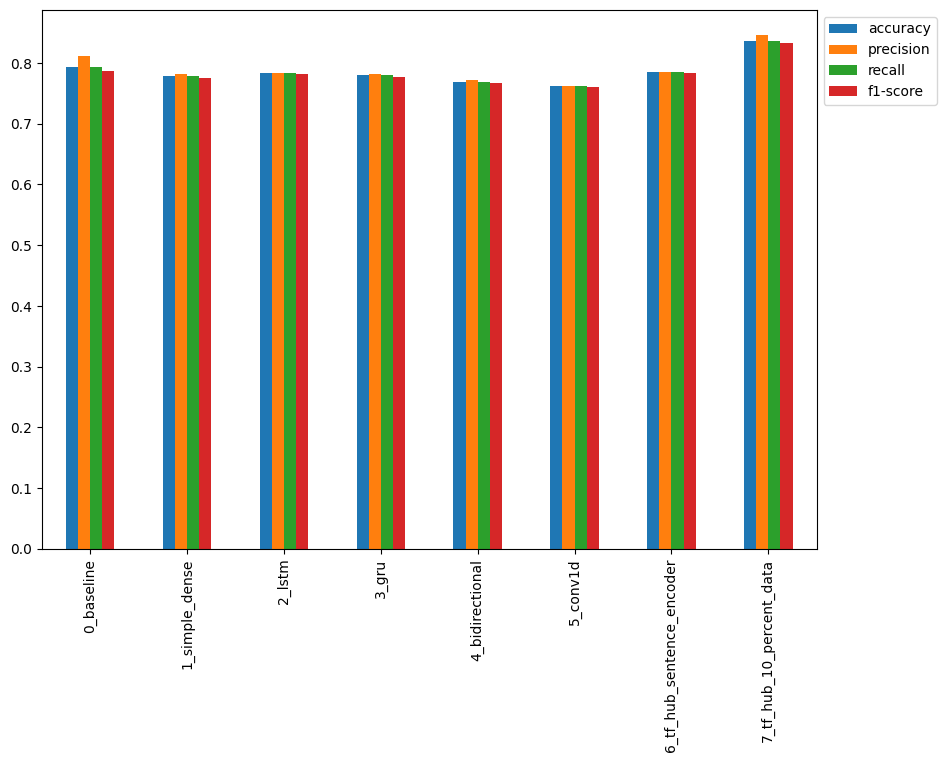

In [115]:
# Plot and compare all of the results
all_model_results.plot(kind = "bar" , figsize = (10 , 7 )).legend(bbox_to_anchor = (1.0 , 1.0));

<Axes: >

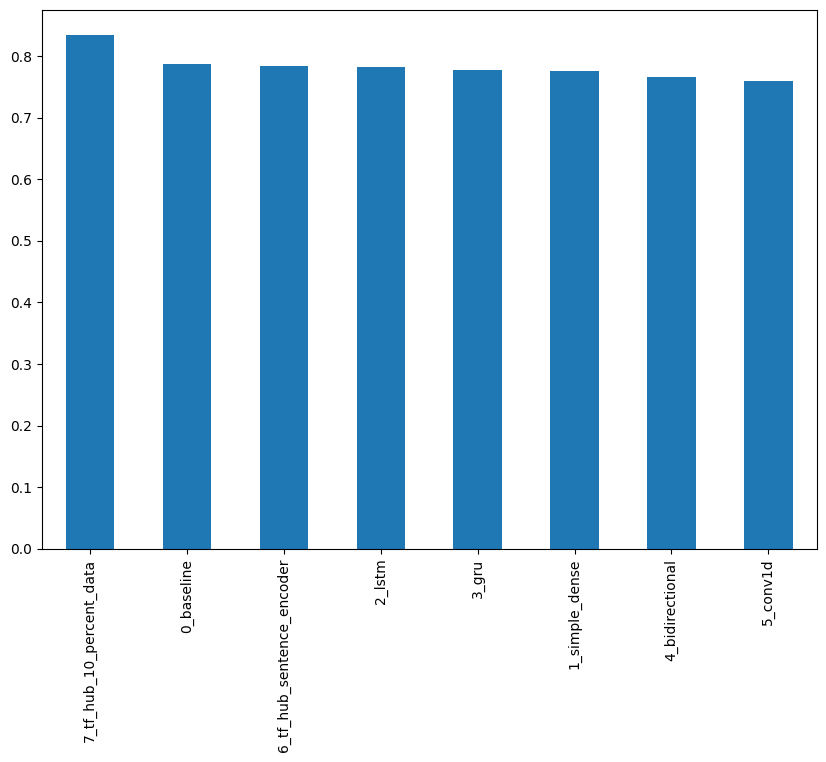

In [116]:
# Sort model results by f1-score
all_model_results.sort_values("f1-score" , ascending = False)["f1-score"].plot(kind = "bar" , figsize = (10 , 7))

# Saving and loading a trained model

There are 2 main formats to save a model to in TensorFlow

1. HDF5 format
2. SavedModel format (this the default when using TensorFlow)

In [117]:
# Save TF hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [118]:
# Load model with custom Hub Layer (required HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5" ,
                                            custom_objects = {"KerasLayer" : hub.KerasLayer}
                                        )